In [1]:
import numpy as np
import pandas as pd
import os

#For Preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [4]:
df = pd.read_csv("Twitter_Data.csv")
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.isnull().sum()
df.dropna(axis=0, inplace=True)

In [6]:
def tweet_to_words(tweet):
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [7]:
tokenized_tweet=df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [when, modi, promised, “minimum, government, m...
1    [talk, all, the, nonsense, and, continue, all,...
2    [what, did, just, say, vote, for, modi, welcom...
3    [asking, his, supporters, prefix, chowkidar, t...
4    [answer, who, among, these, the, most, powerfu...
Name: clean_text, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
#bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

#df_bow = pd.DataFrame(bow.todense())

#df_bow

from nltk.tokenize import RegexpTokenizer
#token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#countv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = bow_vectorizer.fit_transform(df['clean_text'].values.astype('U'))

df_bow = pd.DataFrame(text_counts.todense())
df_bow


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100)


In [38]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))

Train accuracy =69.92%
Test accuracy =68.98%


In [39]:
scoresnb = cross_val_score(cnb, X_train, y_train, cv=10, scoring="accuracy")
print("Scores: ", scoresnb)
print("Mean: ", scoresnb.mean())
print("Standard Deviation: ", scoresnb.std())

mean_accuracy_for_nb = round(scoresnb.mean() * 100,2)
mean_accuracy_for_nb

Scores:  [0.69442496 0.69407433 0.68899018 0.69012973 0.69530154 0.68802595
 0.69197055 0.69556452 0.69545016 0.69711581]
Mean:  0.6931047735446026
Standard Deviation:  0.002966647719612781


69.31

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

#predictnb = cross_val_predict(cnb,X_train, y_train, cv=10)
y_pred = cnb.predict(X_test)
print('y_pred', y_pred)
#confmatnb = multilabel_confusion_matrix(y_test,y_pred)
confmatnb = confusion_matrix(y_test,y_pred)
#ax = plt.subplot()
print('Confusion Matrix for Naive Bayes')
confmatnb

from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(y_test, y_pred))



y_pred [-1.  1. -1. ...  0.  1.  1.]
Confusion Matrix for Naive Bayes

Classification Report

              precision    recall  f1-score   support

        -1.0       0.56      0.61      0.58     10710
         0.0       0.65      0.76      0.70     16712
         1.0       0.82      0.68      0.74     21469

    accuracy                           0.69     48891
   macro avg       0.68      0.68      0.67     48891
weighted avg       0.70      0.69      0.69     48891



Text(0.5, 1.0, 'Confusion Matrix')

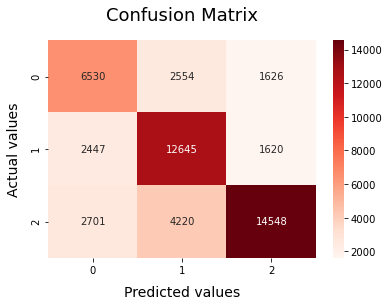

In [44]:
sns.heatmap(confmatnb, annot = True, cmap = 'Reds',fmt = '')

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=100)
dct.fit(X_train, y_train)
print ("Train accuracy ={:.2f}%".format(dct.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(dct.score(X_test,y_test)*100))

Train accuracy =98.46%
Test accuracy =69.84%


In [23]:
scoresdct = cross_val_score(dct, X_train, y_train, cv=10, scoring="accuracy")
print("Scores: ", scoresdct)
print("Mean: ", scoresdct.mean())
print("Standard Deviation: ", scoresdct.std())

mean_accuracy_for_dct = round(scoresdct.mean() * 100,2)
mean_accuracy_for_dct

Scores:  [0.69977209 0.69714236 0.6931101  0.69267181 0.69565217 0.6914446
 0.69880785 0.69679173 0.69895678 0.70009643]
Mean:  0.6964445919811794
Standard Deviation:  0.0029646624867973163


69.64

In [18]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [19]:
print ("Train accuracy ={:.2f}%".format(clf.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(clf.score(X_test,y_test)*100))

Train accuracy =84.66%
Test accuracy =75.88%


In [46]:
scoressvm = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print("Scores: ", scoressvm)
print("Mean: ", scoressvm.mean())
print("Standard Deviation: ", scoressvm.std())

mean_accuracy_for_svm = round(scoressvm.mean() * 100,2)
mean_accuracy_for_svm

Scores:  [0.75639902 0.7634993  0.75306802 0.75674965 0.75631136 0.75350631
 0.75552244 0.75631136 0.76233891 0.75962129]
Mean:  0.7573327661307843
Standard Deviation:  0.003282232333112106


75.73